# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, DepthwiseConv2D, Conv2D, Input, SeparableConv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


(60000, 28, 28)


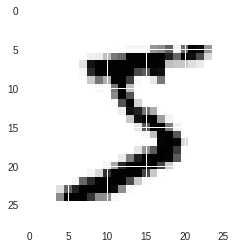

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
sep_conv = SeparableConv2D(64, (3,3), strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1,1), depth_multiplier=1, activation='relu', use_bias=True, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)
sep_conv1 = SeparableConv2D(32, (3,3), strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1,1), depth_multiplier=1, activation='relu', use_bias=True, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)
sep_conv2 = SeparableConv2D(16, (3,3), strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1,1), depth_multiplier=1, activation='relu', use_bias=True, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(center=False, scale=False, epsilon=1e-5))
#model.add(Conv2D(32, (3,3),activation='relu'))
model.add(sep_conv1)
model.add(Conv2D(16, 1, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(sep_conv2)
#model.add(sep_conv1)
#model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(10, 1, activation='relu'))
model.add(Conv2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        64        
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 24, 24, 32)        1344      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 10, 10, 16)        416       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 10)        170       
__________

In [0]:
optimizer_adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer=optimizer_adam,
             metrics=['accuracy'])
print(model.optimizer.get_config().__getitem__('lr'))

9.999999747378752e-05


In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
60000/60000 [==============================] - 24s 392us/step - loss: 0.0028 - acc: 0.9993
Epoch 2/30
60000/60000 [==============================] - 22s 370us/step - loss: 0.0016 - acc: 0.9998
Epoch 3/30
60000/60000 [==============================] - 22s 369us/step - loss: 0.0014 - acc: 0.9997
Epoch 4/30
60000/60000 [==============================] - 22s 371us/step - loss: 0.0011 - acc: 0.9999
Epoch 5/30
60000/60000 [==============================] - 22s 368us/step - loss: 9.6611e-04 - acc: 0.9999
Epoch 6/30
60000/60000 [==============================] - 22s 370us/step - loss: 9.4218e-04 - acc: 0.9999
Epoch 7/30
60000/60000 [==============================] - 22s 370us/step - loss: 6.5284e-04 - acc: 0.9999
Epoch 8/30
60000/60000 [==============================] - 22s 368us/step - loss: 6.5384e-04 - acc: 0.9999
Epoch 9/30
60000/60000 [==============================] - 22s 368us/step - loss: 6.7427e-04 - acc: 0.9999
Epoch 10/30
60000/60000 [==============================] - 22s

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.06590267554263093, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.48576438e-14 4.62102405e-12 5.98029515e-10 1.09926923e-09
  7.00403471e-17 1.15463212e-11 1.70260009e-25 1.00000000e+00
  1.00294755e-11 4.67225725e-09]
 [6.65540556e-09 1.27681517e-06 9.99998689e-01 1.29344882e-10
  3.27541738e-16 6.81787417e-13 7.03270109e-09 1.11838591e-17
  4.41927023e-10 2.97908370e-16]
 [2.66357639e-12 9.99956727e-01 7.25616155e-06 2.04087902e-09
  1.70250660e-05 5.34736103e-07 1.78250537e-09 1.06951102e-05
  7.76543220e-06 4.81489515e-09]
 [9.99999523e-01 8.91031015e-16 2.36854262e-07 2.67255429e-13
  8.40318023e-11 7.48818785e-10 2.09444792e-07 5.18244573e-14
  1.94971039e-10 1.35492728e-09]
 [2.88510260e-09 1.91944269e-12 2.21008167e-09 3.97989020e-12
  9.98801470e-01 1.34767575e-09 1.23992136e-12 2.07574100e-08
  6.54703581e-06 1.19195820e-03]
 [3.48487955e-14 9.99928355e-01 4.59599704e-07 4.94331798e-11
  1.91991148e-05 6.78894239e-08 1.58831889e-11 5.04312993e-05
  1.46618584e-06 1.42036516e-09]
 [2.12342640e-18 5.19895897e-11 2.85739532e-07 1.01657039e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored